In [12]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";")

df.head()

,REPORTDATE,VALUE
0,30.12.2013,3457625638
1,31.12.2013,3417092149
2,01.01.2014,3417092149
3,02.01.2014,3417092149
4,03.01.2014,3417092149


In [11]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   REPORTDATE  2111 non-null   object
 1   VALUE       2111 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";", parse_dates=['REPORTDATE'], dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   REPORTDATE  2111 non-null   datetime64[ns]
 1   VALUE       2111 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.1 KB


In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";", parse_dates=['REPORTDATE'], dayfirst=True)

df = df.sort_values('REPORTDATE', ascending=True)
df.head()

,REPORTDATE,VALUE
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-01-02,3417092149
4,2014-01-03,3417092149


<Axes: xlabel='REPORTDATE', ylabel='VALUE'>

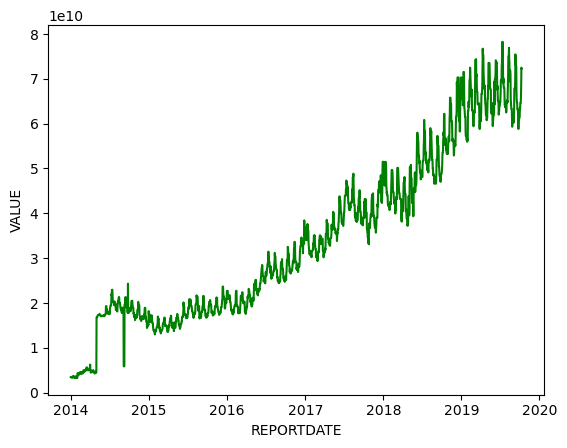

In [14]:
#Визуализируем наши данные.

import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";", parse_dates=['REPORTDATE'], dayfirst=True)

df = df.sort_values('REPORTDATE', ascending=True)

sns.lineplot(data=df, x="REPORTDATE", y="VALUE", color='green')

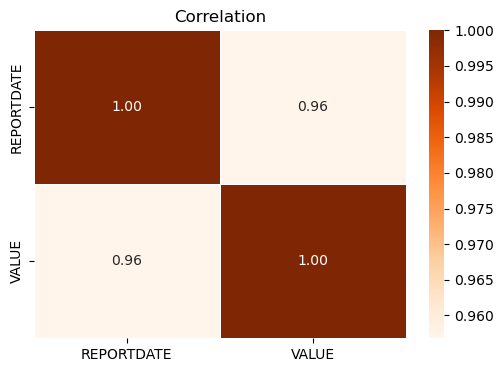

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";", parse_dates=['REPORTDATE'], dayfirst=True)
df = df.sort_values('REPORTDATE', ascending=True)

correlation_map = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_map, annot=True, cmap='Oranges', fmt='.2f', linewidths=0.5)
plt.title('Correlation')
plt.show()

In [26]:
#Данные выглядят рвано. Наша модель рискует переобучиться. Попробуем отобразить статистику по месяцам.

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";", parse_dates=['REPORTDATE'], dayfirst=True)

df = df.sort_values('REPORTDATE', ascending=True)
dg = df.groupby(pd.Grouper(key='REPORTDATE', freq='1M')).mean()
dg.head()

,VALUE
REPORTDATE,
2013-12-31,3.437359e+09
2014-01-31,3.483258e+09
2014-02-28,4.370265e+09
2014-03-31,5.147793e+09
2014-04-30,5.049504e+09


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";", parse_dates=['REPORTDATE'], dayfirst=True)

df = df.sort_values('REPORTDATE', ascending=True)
dg = df.groupby(pd.Grouper(key='REPORTDATE', freq='1M')).mean()
dg.tail()

,VALUE
REPORTDATE,
2019-06-30,6.743381e+10
2019-07-31,6.846319e+10
2019-08-31,6.729228e+10
2019-09-30,6.521837e+10
2019-10-31,6.616570e+10


<Axes: xlabel='REPORTDATE', ylabel='VALUE'>

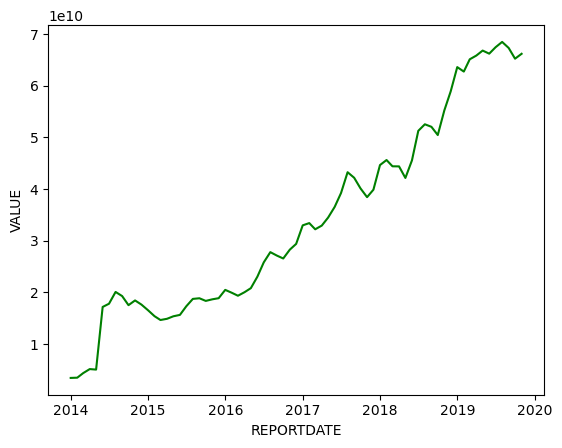

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";", parse_dates=['REPORTDATE'], dayfirst=True)

df = df.sort_values('REPORTDATE', ascending=True)
dg = df.groupby(pd.Grouper(key='REPORTDATE', freq='1M')).mean()
sns.lineplot(data=dg, x="REPORTDATE", y="VALUE", color='green')

In [32]:
#Теперь обучим модель.

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'C:\Users\Volot\Desktop\Стажировка сбер\ВС DS Сбер data.csv', sep=";", parse_dates=['REPORTDATE'], dayfirst=True)

df = df.sort_values('REPORTDATE', ascending=True)
dg = df.groupby(pd.Grouper(key='REPORTDATE', freq='1M')).mean()

X = dg
y = dg['VALUE'].values.reshape(-1,1)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)

y_train = y_train.ravel()
y_test = y_test.ravel()

linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_pred = linear_regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(y_pred)
print('R2 =', r2_score(y_test, y_pred))
print('mse =', mse)

[2.93748108e+10 5.14779315e+09 1.83427702e+10 3.22020304e+10
 4.37026550e+09 1.77971092e+10 2.71122096e+10 3.29170657e+10
 3.84214751e+10 4.43922729e+10 6.72922771e+10 1.93436761e+10
 5.04950386e+09 4.56070533e+10 3.34004648e+10]
R2 = 1.0
mse = 7.251704422136148e-11


In [ ]:
# Модель отлично работает на тестовой группе данных. Что и требовалось получить.